# 1. Miary jakości:
\# plusy mamy zrobione
- confusion matrix z dobranym progiem IoU ≥ α np. α=0.4 dla segmentacji zmian w - płucach, α=0.8-0.9 dla segmentacji płuc +
- dokładność +
- precyzja +
- czułość +
- swoistość +
- Dice Coefficient +
- ROC
- współczynnik Giniego +
- pole pod wykresem krzywej ROC (AUC)​ +
- pixel accuracy +
- Intersection over Union +
- Hausdorff distance
- mean / average surface distance

Będziemy dokonywać na zbiorze LIDC, ponieważ mamy tylko 2 dwie klasy oznaczeń, zatem możemy skorzystać z większej ilości miar.

Wczytanie paczek i danych:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('training.log')

Wyliczenie niektórych miar:

In [ ]:
df['val_accuracy'] = (df['val_true_positives']+df['val_true_negatives'])/(df['val_true_positives']+df['val_true_negatives']+df['val_false_positives']+df['val_false_negatives'])
df['val_precision'] = df['val_true_positives']/(df['val_true_positives']+df['val_false_positives'])
df['val_recall'] = df['val_true_positives']/(df['val_true_positives']+df['val_false_negatives'])
df['val_specificity'] = df['val_true_negatives']/(df['val_true_negatives']+df['val_false_positives'])
df['val_gini'] = 2*df['val_auc']-1

In [ ]:
df.head()

,epoch,auc,dice_coef,entrONA,false_negatives,false_postives,iou_coef,loss,true_negatives,true_positives,val_auc,val_dice_coef,val_entrONA,val_false_negatives,val_false_positives,val_iou_coef,val_loss,val_true_negatives,val_true_positives,val_waccOA,val_wcceOA,waccOA,wcceOA,val_accuracy,val_precision,val_recall,val_specificity,val_gini
0,0,0.652879,0.581802,0.359560,67.276253,34241.140625,0.417306,0.387086,227731.500000,104.152496,0.797906,0.663284,0.449608,96.470001,4456.475098,0.499283,0.293383,257505.796875,85.205002,0.922894,0.276024,0.854161,0.390145,0.982632,0.018761,0.468997,0.982988,0.595813
1,1,0.808507,0.698727,0.289380,44.586250,24497.902344,0.539174,0.283803,237464.734375,136.797501,0.839930,0.727828,0.259028,26.975000,24078.669922,0.575683,0.247162,237912.312500,126.050003,0.914401,0.245843,0.899145,0.283184,0.908044,0.005208,0.823722,0.908094,0.679860
2,2,0.827538,0.713937,0.312239,40.182499,19161.884766,0.557314,0.273217,242815.937500,126.129997,0.881835,0.773547,0.293030,44.044998,16073.519531,0.634153,0.299685,245897.984375,128.455002,0.870690,0.300424,0.902279,0.268882,0.938516,0.007928,0.744667,0.938644,0.763670
3,3,0.842440,0.729774,0.306536,42.051250,18577.371094,0.575748,0.262339,243409.156250,115.236252,0.866165,0.768462,0.251222,37.299999,21126.490234,0.632028,0.329468,240841.203125,139.154999,0.856920,0.338162,0.904705,0.257428,0.919267,0.006544,0.788615,0.919355,0.732330
4,4,0.860709,0.745680,0.294879,43.358749,16900.548828,0.596130,0.243981,245064.265625,135.744995,0.867770,0.770060,0.233875,23.629999,22639.189453,0.629947,0.241682,239313.062500,168.119995,0.905894,0.242550,0.907154,0.238326,0.913548,0.007371,0.876767,0.913575,0.735540


## Confusion matrix
Miara pokazuje wyznaczane wartości w czasie. Nasz model lekko się polepsza. Algorytm często oznacza zdrową tkankę jako chorą.

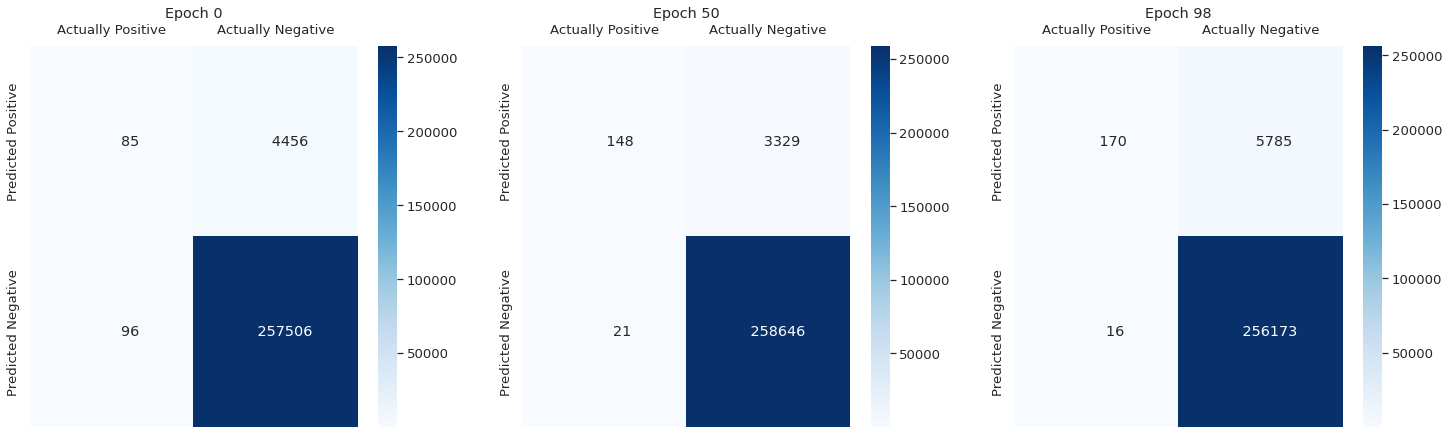

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
epoch_n = 0 #epoch number to display
matrix = pd.DataFrame([df.loc[df.epoch==epoch_n, ['val_true_positives', 'val_false_positives']].values[0], 
                       df.loc[df.epoch==epoch_n, ['val_false_negatives', 'val_true_negatives']].values[0]], 
                      columns=['Actually Positive', 'Actually Negative'], index=['Predicted Positive', 'Predicted Negative'])
sns.set(font_scale=1.2)
sns.heatmap(matrix, ax=axes[0], annot=True, cmap = "Blues", fmt='10.0f')
axes[0].set_yticklabels(labels=['Predicted Positive', 'Predicted Negative'], fontdict={'verticalalignment':'center'})
axes[0].tick_params(labeltop=True, labelbottom=False)
axes[0].set_title(f'Epoch {epoch_n}')

epoch_n = 50 #epoch number to display
matrix = pd.DataFrame([df.loc[df.epoch==epoch_n, ['val_true_positives', 'val_false_positives']].values[0], 
                       df.loc[df.epoch==epoch_n, ['val_false_negatives', 'val_true_negatives']].values[0]], 
                      columns=['Actually Positive', 'Actually Negative'], index=['Predicted Positive', 'Predicted Negative'])
sns.set(font_scale=1.2)
sns.heatmap(matrix, ax=axes[1], annot=True, cmap = "Blues", fmt='10.0f')
axes[1].set_yticklabels(labels=['Predicted Positive', 'Predicted Negative'], fontdict={'verticalalignment':'center'})
axes[1].tick_params(labeltop=True, labelbottom=False)
axes[1].set_title(f'Epoch {epoch_n}')

epoch_n = 98 #epoch number to display
matrix = pd.DataFrame([df.loc[df.epoch==epoch_n, ['val_true_positives', 'val_false_positives']].values[0], 
                       df.loc[df.epoch==epoch_n, ['val_false_negatives', 'val_true_negatives']].values[0]], 
                      columns=['Actually Positive', 'Actually Negative'], index=['Predicted Positive', 'Predicted Negative'])
sns.set(font_scale=1.2)
sns.heatmap(matrix, ax=axes[2], annot=True, cmap = "Blues", fmt='10.0f')
axes[2].set_yticklabels(labels=['Predicted Positive', 'Predicted Negative'], fontdict={'verticalalignment':'center'})
axes[2].tick_params(labeltop=True, labelbottom=False)
axes[2].set_title(f'Epoch {epoch_n}')

plt.show()

## Dokładność / Pixel Accuracy
Dla naszych danych nie jest najlepszą miarą, ponieważ rozkład naszego targetu nie jest zbilansowany. Dokładność jest tym samym, co pixel accuracy, ponieważ określamy tylko lokalizację guza. Dzięki precison widać, że accuracy wcale nie jest taką dobrą miarą.

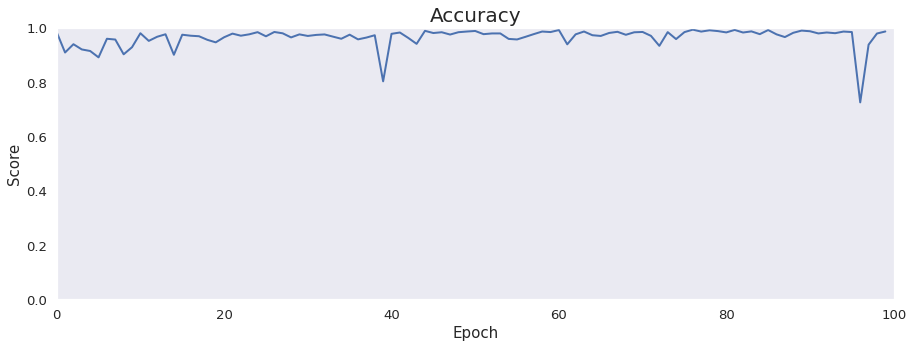

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_accuracy'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Accuracy', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Precyzja
Ta miara informuje o ułamku na prawdę pozytywnych przypadków spośród wszystkich przypadków zaklasyfikowanych pozytywnie. Jest dosyć istotna w naszym przypadku, ponieważ nie chcemy błędnie przypisać zdrowemu choroby. Wynika z niej, że znajdujemy za wiele przypadków. Jednak nie należy się zbyt sugerować słabym wynikiem, bo z confusion matrix wynika, że wciąż tych false postitive przypadków jest dosyć mało.

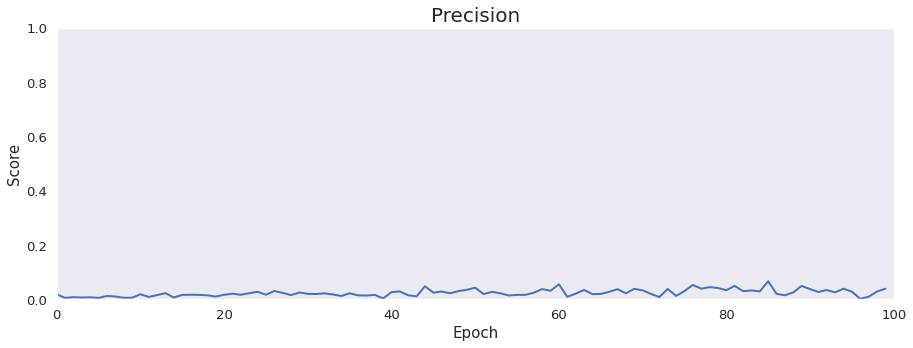

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_precision'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Precision', size = 20)
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.grid()
plt.show()

## Czułość
Ta miara informuje jaki ułamek pozytywnych przypadków udaje nam się znaleźć. Jest bardzo istotna, ponieważ nie chcemy pominąć żadnego chorego. Bardzo ważne jest, aby wykryć jak najwięcej chorób. Wynika z niej, że nasz algorytm znajduje większość przypadków.

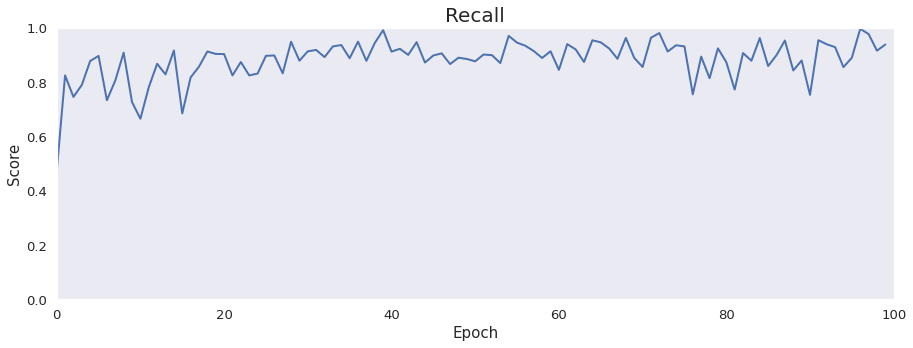

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_recall'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Recall', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Swoistość
Ta miara informuje jaki ułamek negatywnych przypadków udaje nam się znaleźć. Jak widać większość zdrowych tkanek jest znajdowana.

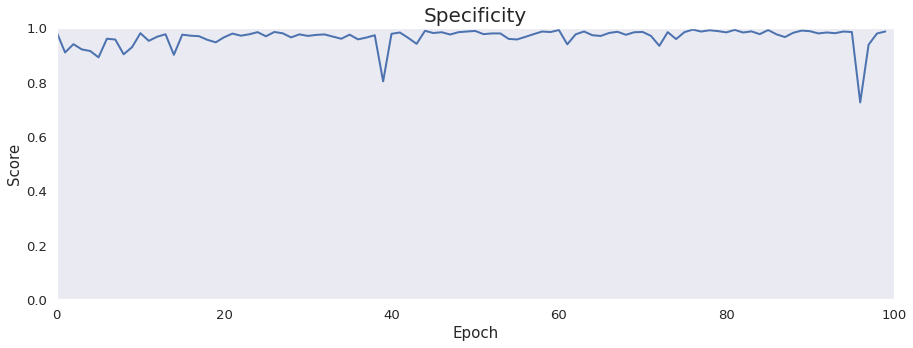

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_specificity'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Specificity', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Dice Coefficient
Ta miara mówi jak dużo pozytywnych przpadków znajdujemy, a jednocześnie bierze pod uwagę false positives i false negatives. Jest bardzo podobna do Intersection over Union.
```python
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
    union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3])
    dice = K.mean((2. * intersection + smooth) / (union + smooth), axis=0)
    return dice
```


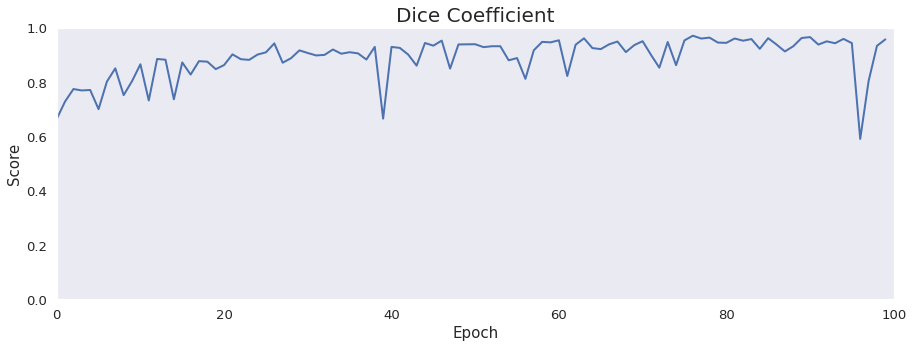

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_dice_coef'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Dice Coefficient', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## ROC

## Pole pod wykresem krzywej ROC (AUC)​
Skorzytaliśmy z gotowej implementacji kerasa, ale wyniki nie do końca są zgodne z precision i recall, więc być może jest jakiś błąd.

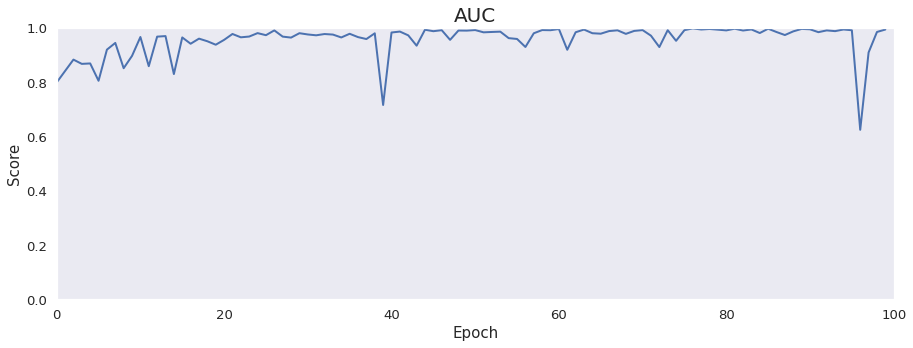

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_auc'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('AUC', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Współczynnik Giniego
Zależy on od AUC i dlatego też może być błąd.

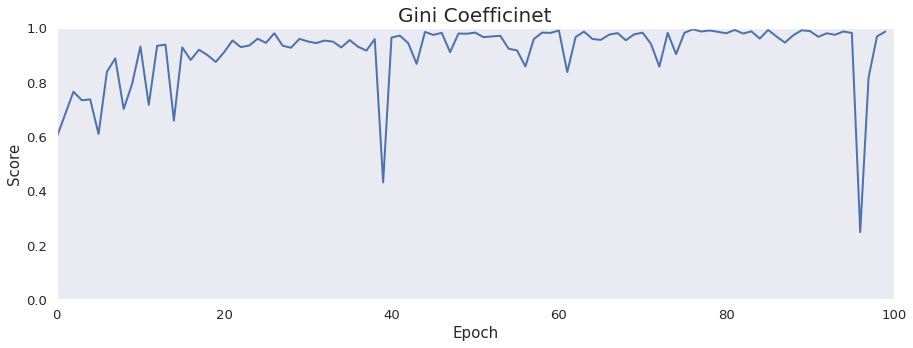

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_gini'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Gini Coefficinet', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Intersection over Union
Ta miara pokazuje jak przewidywania modelu się pokrywają z chorą tkanką na obrazku. Jak widać, algorytm się dobrze poprawia w czasie.
```python
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1, 2, 3])
    union = K.sum(y_true, [1, 2, 3]) + K.sum(y_pred, [1, 2, 3]) - intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou
```

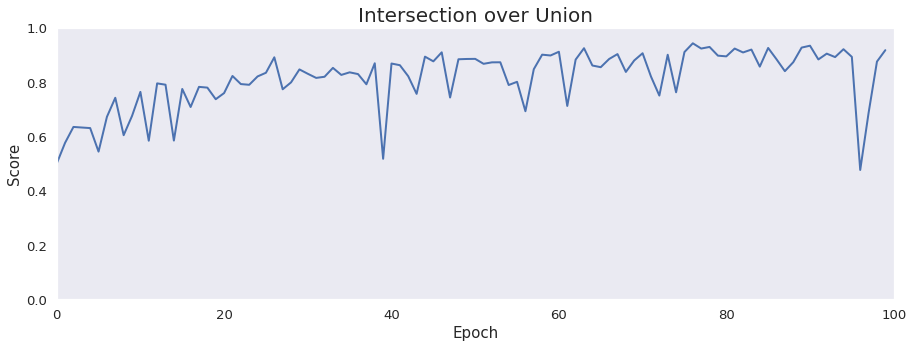

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['epoch'], df['val_iou_coef'], linewidth=2.0)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Score', size = 15)
plt.title('Intersection over Union', size = 20)
plt.grid()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.show()

## Hausdorff distance i Mean surface distance

Obie te miary starają się zmierzyć podobieństwo między zaznaczonymi obszarami przez model oraz obszarami prawidłowymi, najczęściej zaznaczonymi przez eksperta.  
W przypadku mean surface distance mierzymy długość części wspólnej granicy i normalizujemy przez średnią długość całej granicy.


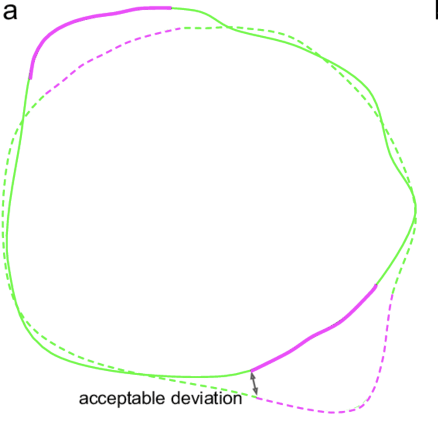

W przypadku Hausdorff distance mierzymy największą odległość między granicami.

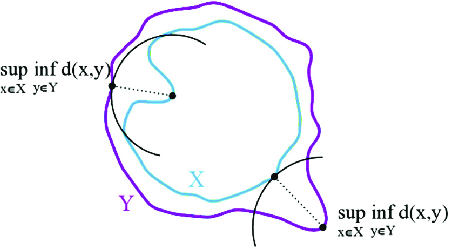

Niestety w obu przypadkach te metryki nie dadzą sensownych wyników do naszej sieci, ponieważ mimo usilnych prób, sieć cały czas zaznacza całe obrazy jedną klasą. Dlatego MSD zawsze będzie wynosić 0/Inf, a Hausdorff zawsze Inf.